EXPERIMENTO: Se comparan kernels que aplican filtros de manera normal o filtros de manera dividida, con y sin memoria local. Se ha fijado un local size, una imagen y se están cambiando el tamaño de los filtros.


OBJETIVO: Determinar que es mejor aplicar filtros de manera dividida, sobre todo para filtros grandes.


OUTPUT:Tabla con los valores, gráfico comparando.


DONDE: EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS

DESCARGAR PYOPENCL

In [1]:
pip install pyopencl

Note: you may need to restart the kernel to use updated packages.


IMPORTAR LIBRERIAS

In [2]:
import pyopencl as cl
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from collections import defaultdict

c:\Users\Eevee\anaconda3\Lib\site-packages\pytools\persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


IMPORTAR ARCHIVOS Y FUNCIONES

In [3]:
import funciones_ejecutar_kernel_filtros as ff
import kernels_filtros_imagenes as kernel
import filtros as f
import funciones_experimento_filtros as ex

VALORES IMPORTANTES A MODIFICAR SEGÚN ORDENADOR

In [4]:
'''
 # Datos GPU
compute_units = 82
processing_elements = 8

#RUTA DE ARCHIVOS
path="C:/Users/maria/OneDrive/OPENCL/RESULTADOS_PORTATIL"

'''


path="C:/Users/Eevee"
# Datos GPU
compute_units = 82   #Adaptar según la GPU
processing_elements = 128




FUNCION PRINCIPAL

DataFrames guardados y formateados en Excel en C:/Users/Eevee\OPENCL/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS/resultados.xlsx


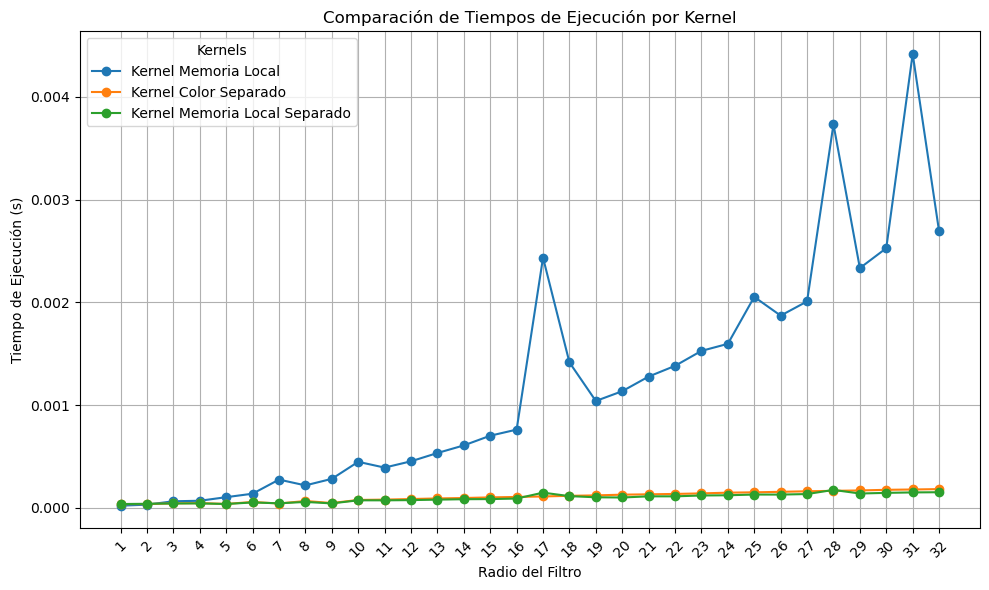

In [5]:


#KERNELS A USAR
kernels_codes = [kernel.kernel_filter_color_local_organizado, kernel.kernel_filter_color_rectangular,kernel.kernel_filter_color_local_rectangular]

#NOMBRES DE LOS KERNELS

kernels_names = ["kernel_filter_color_local_organizado", "kernel_filter_color_rectangular","kernel_filter_color_local_rectangular"]

#FUNCIONES A APLICAR

funciones = [ff.aplicar_filtro_local, ff.aplicar_filtro_color_dividido,ff.aplicar_filtro_local_dividido]

#IMAGEN PARA APLICAR FILTROS

image_path = os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen800x600.jpg")

#LOCAL SIZE FIJADO

local_size = (8, 8)  # Tamaño local deseado

# Filtros de ejemplo
# Filtros en filtros1 (3x3 a 64x64)
filtros1 = [
    f.filtro_mean1, f.filtro_mean2, f.filtro_mean3, f.filtro_mean4, 
    f.filtro_mean5, f.filtro_mean6, f.filtro_mean7, 
    f.filtro_mean8, f.filtro_mean9, f.filtro_mean10, 
    f.filtro_mean11, f.filtro_mean12, f.filtro_mean13, 
    f.filtro_mean14, f.filtro_mean15, f.filtro_mean16,
    f.filtro_mean17, f.filtro_mean18, f.filtro_mean19, 
    f.filtro_mean20, f.filtro_mean21, f.filtro_mean22, 
    f.filtro_mean23, f.filtro_mean24, f.filtro_mean25,
    f.filtro_mean26, f.filtro_mean27, f.filtro_mean28, 
    f.filtro_mean29, f.filtro_mean30, f.filtro_mean31, f.filtro_mean32
]

# Filtros en filtros2 (versiones divididas)
filtros2 = [
    (f.filtro_mean1X, f.filtro_mean1Y),
    (f.filtro_mean2X, f.filtro_mean2Y),
    (f.filtro_mean3X, f.filtro_mean3Y), 
    (f.filtro_mean4X, f.filtro_mean4Y),
    (f.filtro_mean5X5X, f.filtro_mean5X5Y), 
    (f.filtro_mean6X, f.filtro_mean6Y),
    (f.filtro_mean7x7X, f.filtro_mean7x7Y), 
    (f.filtro_mean8X, f.filtro_mean8Y),
    (f.filtro_mean9x9X, f.filtro_mean9x9Y), 
    (f.filtro_mean10X, f.filtro_mean10Y),
    (f.filtro_mean11X, f.filtro_mean11Y),
    (f.filtro_mean12X, f.filtro_mean12Y),
    (f.filtro_mean13X, f.filtro_mean13Y),
    (f.filtro_mean14X, f.filtro_mean14Y),
    (f.filtro_mean15X, f.filtro_mean15Y),
    (f.filtro_mean16X, f.filtro_mean16Y),
    (f.filtro_mean17X, f.filtro_mean17Y),
    (f.filtro_mean18X, f.filtro_mean18Y),
    (f.filtro_mean19X, f.filtro_mean19Y),
    (f.filtro_mean20X, f.filtro_mean20Y),
    (f.filtro_mean21X, f.filtro_mean21Y),
    (f.filtro_mean22X, f.filtro_mean22Y),
    (f.filtro_mean23X, f.filtro_mean23Y),
    (f.filtro_mean24X, f.filtro_mean24Y),
    (f.filtro_mean25X, f.filtro_mean25Y),
    (f.filtro_mean26X, f.filtro_mean26Y),
    (f.filtro_mean27X, f.filtro_mean27Y),
    (f.filtro_mean28X, f.filtro_mean28Y),
    (f.filtro_mean29X, f.filtro_mean29Y),
    (f.filtro_mean30X, f.filtro_mean30Y),
    (f.filtro_mean31X, f.filtro_mean31Y),
    (f.filtro_mean32X, f.filtro_mean32Y)
    ]  # Para filtros divididos de 3x3 hasta 64x64

#LLAMAR A LA FUNCION 

save_path = os.path.join(path, "OPENCL/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS/")
df_resultados = ex.comparar_filtros(kernels_codes, kernels_names, funciones, image_path, local_size, cl.device_type.GPU, filtros1, filtros2,save_path)

